# Big Mart Sales

#### Contents
1. Problem statement
2. Hypothesis definition
3. Data Cleaning
4. Data Exploration 
5. Feature Engineering
6. Model Building

### Problem statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

### Hypothesis
#### Store level hypothesis 
1. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
2. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
3. Store type : SUpermarkets are known to make more sales than grocery stores.
4. Year of establishment: people are attracted to newer stores do to the assumption that there may be newer products
#### product level hypothesis
1. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
2. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
3. Price of item. Cheaper items are sold more than the more expensive items.

### Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train['source']='train'
test['source']='test'

In [4]:
data = pd.concat([train, test],ignore_index=True)

/home/muoki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [5]:
test.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test


In [6]:
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train


In [7]:
print(" Train shape {} \n Test {} \n data {}" .format(train.shape, test.shape, data.shape))

 Train shape (8523, 13) 
 Test (5681, 12) 
 data (14204, 13)


Train data frame has 8523 entries each with 12 columns while the test dataframe contains 5681 entries with  11 entries.

#### Removing null values



In [8]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

the weight of similar items then convert to dictionary.

In [9]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

In [10]:
item_avg_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
DRB24,8.785
DRB25,12.300
DRB48,16.750
DRC01,5.920


In [11]:
dic = item_avg_weight.to_dict()

In [12]:
dic2 = dic['Item_Weight']

map the dictionary to theit correct values.

In [13]:
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Identifier'].map(dic2))

In [14]:
data['Item_Weight'].isnull().sum()

0

In [15]:
data[data['Item_Weight'].isnull()]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source


Removing nan for outlet size.
We can fill with the mode of outlet type.


In [16]:
from scipy.stats import mode

In [17]:
outlet_size_mode = data.pivot_table(values='Outlet_Size',
                                   columns='Outlet_Type',
                                   aggfunc=lambda x: x.mode().iat[0])

In [18]:
outlet_size_mode = outlet_size_mode.T

In [19]:
outlet_size_dict = outlet_size_mode.to_dict()

In [20]:
outlet_size_dict_ = outlet_size_dict['Outlet_Size']

In [21]:
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Type'].map(outlet_size_dict_))

In [22]:
print(data['Outlet_Size'].isnull().sum())

0


In [23]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

With out the null values we can test some of the hypothesis


In [24]:
def hypo_plots(col, pkind='bar'):
    print('Value counts of {} \n {}' .format(col,data[col].value_counts().sort_values(ascending=False)))
    col_plot = data[col].value_counts().plot(kind=pkind, title= (str(col)+ "Value count plots"))
    plt.show()
    print('\n\n Sales from {} values' .format(col))
    print('\n {}' .format(data.groupby(train[col]).mean()['Item_Outlet_Sales'].sort_values(ascending=False)))
    
    print("\n")
    data.groupby(train[col]).mean()['Item_Outlet_Sales'].plot(kind=pkind,
                                                                     title= ("Item sales vs "+str(col)))
    

#### Outlet size

Value counts of Outlet_Size 
 Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64


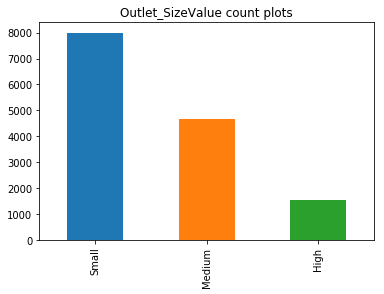



 Sales from Outlet_Size values

 Outlet_Size
Medium    2681.603542
High      2298.995256
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64




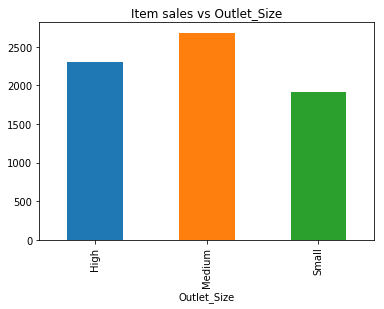

In [25]:
hypo_plots('Outlet_Size')

There are more small sized outlets than the rest. looking at the sales from outlet sizes the sales from medium  sized outlets are more followed by High sized outlets then small sized.


#### City type:
Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.

Value counts of Outlet_Location_Type 
 Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64


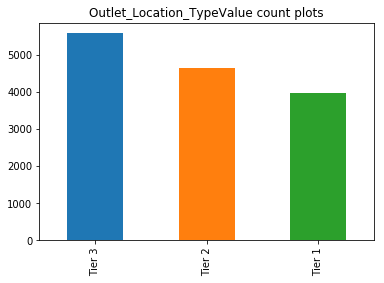



 Sales from Outlet_Location_Type values

 Outlet_Location_Type
Tier 2    2323.990559
Tier 3    2279.627651
Tier 1    1876.909159
Name: Item_Outlet_Sales, dtype: float64




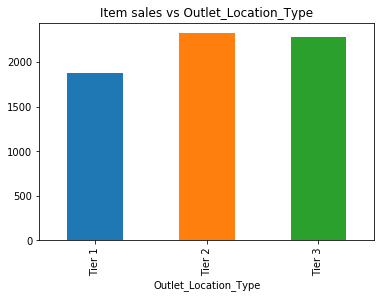

In [26]:
hypo_plots('Outlet_Location_Type')

Tier 3 outlets are more than 2 and 1. The sales from tier 2 are more. This result is consistent with those of outlet size as outlets in tier 2 are in medium sized towns.

#### Outlet_Type



Value counts of Outlet_Type 
 Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


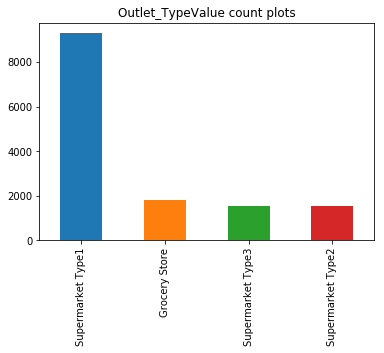



 Sales from Outlet_Type values

 Outlet_Type
Supermarket Type3    3694.038558
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Grocery Store         339.828500
Name: Item_Outlet_Sales, dtype: float64




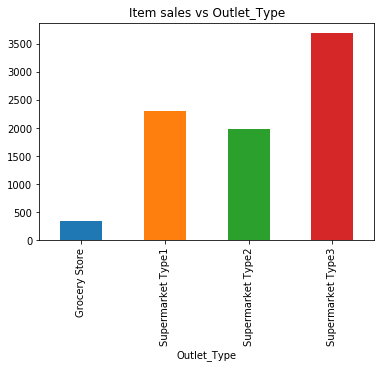

In [27]:
hypo_plots('Outlet_Type')

There are more Supermarket type 1  than anyother type. Sales from type 3 supermarkets are more.

#### Outlet_Establishment_Year

Value counts of Outlet_Establishment_Year 
 1985    2439
1987    1553
2004    1550
1997    1550
1999    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64


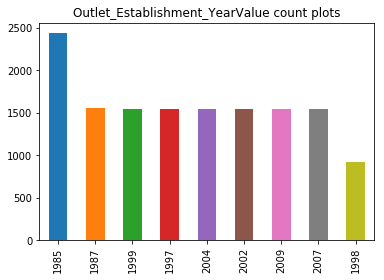



 Sales from Outlet_Establishment_Year values

 Outlet_Establishment_Year
1985.0    2483.677474
2004.0    2438.841866
1999.0    2348.354635
2007.0    2340.675263
1987.0    2298.995256
1997.0    2277.844267
2002.0    2192.384798
2009.0    1995.498739
1998.0     339.351662
Name: Item_Outlet_Sales, dtype: float64




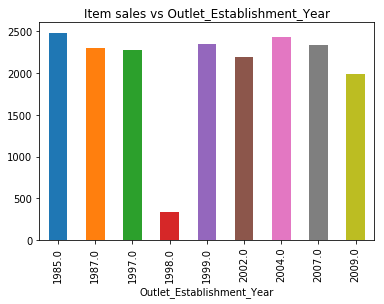

In [28]:
hypo_plots('Outlet_Establishment_Year')

The stores have tried establishing a consistent number of stores each year apart from 1998 and 1985.
The sales are fairly consistent.

#### Item type

Value counts of Item_Type 
 Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


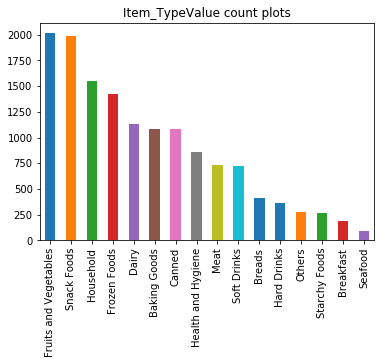



 Sales from Item_Type values

 Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64




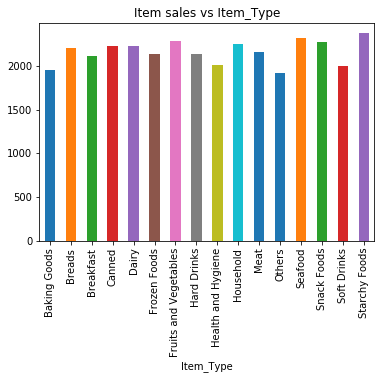

In [29]:
hypo_plots('Item_Type')

#### Outlet_Identifier

In [30]:
#hypo_plots('Outlet_Identifier')

#### Item_Fat_Content

Value counts of Item_Fat_Content 
 Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


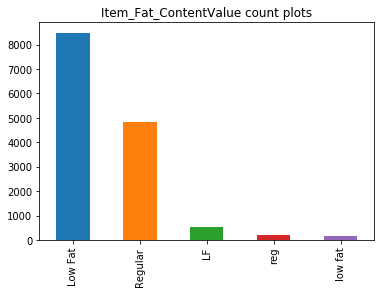



 Sales from Item_Fat_Content values

 Item_Fat_Content
Regular    2235.186702
Low Fat    2164.477336
low fat    2087.740737
LF         2073.551928
reg        1962.192268
Name: Item_Outlet_Sales, dtype: float64




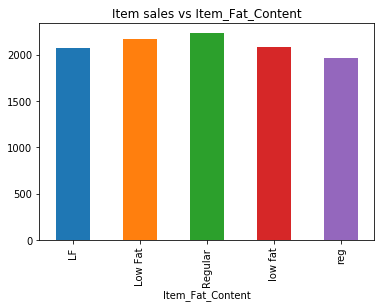

In [31]:
hypo_plots('Item_Fat_Content')

Low fat items are sold more than regular fat items.

### Feature engineering


#### broad category of Type of Item
If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. So I’ve used the Item_Identifier variable to create a new column:

In [32]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

#### Determine the years of operation of a store

In [33]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

####  Modify categories of Item_Fat_Content

In [34]:
#Change categories of low fat:
print ('Original Categories:')
print (data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [36]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

#### Numerical and One-Hot Coding of Categorical variables

 scikit-learn accepts only numerical variables, I converted all categories of nominal variables into numeric types. Also, I wanted Outlet_Identifier as a variable as well. So I created a new variable ‘Outlet’ same as Outlet_Identifier and coded that. Outlet_Identifier should remain as it is, because it will be required in the submission file.

In [37]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])


In [38]:
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. For example, the Item_Fat_Content has 3 categories – ‘Low Fat’, ‘Regular’ and ‘Non-Edible’. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers – 0 (if the category is not present) and 1(if category is present). This can be done using ‘get_dummies’ function of Pandas.

In [39]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [40]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

In [41]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

/home/muoki/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Model Building.
We will first build with 6 mode